# <center>Pandas</center>

## <center>DOxMX</center>

## <center>15 de marzo de 2019<center>

## <center>Max (GaRaGeD) Valdez</center>

# Pandas: Python Data Analysis Library

https://pandas.pydata.org

pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

# ¿ Qué es, para dónde va y cuánto le falta ?

Pandas es una herramienta para analizar y manipular datos "relacionales" o "etiquetados" de manera sencilla...

El objetivo de desarrollo es hacer de Pandas una de las herramientas más importantes en cuestión de análisis de datos, ciencia de datos, machine learning y demás. 

En general podemos decir que ya está ahí, y probablemente siga como líder en el área por mucho tiempo.

Entre las cosas que se pueden hacer con Pandas están:
* Trabajar con datos tabulares heterogéneos como los que se usan en SQL, Hojas de Cálculo, etc.
* Manejar series de tiempo en todas sus variantes
* Datos matriciales (2D) de cualquier tipo
* Cualquier tipo de datos experimentales, estadísticos
* No es necesario que los datos estén etiquetados

# Tipos de datos

* Series (1D)
* DataFrame (2D)

Con ellos se pueden manejar muchos tipos de los análisis estadísticos, financieros, de ciencias sociales, biología e ingeniería.

Un DataFrame hace lo mismo que un data.frame de R y más, gracias a que Pandas implementa sus características sobre NumPy heredando todas las características del este y extendiéndolo.

Pandas ayuda a realizar fácilmente:
* Manejo de huecos de datos (faltantes)
* Cambio de tamaño: se pueden borrar e insertar columnas trivialmente
* Agrupar (group by) datos de manera versátil para agregar y tranformar con operaciones de separación-aplicación-combinación
* Conversión de otros tipos de datos de Python y NumPy a DataFrame de manera sencilla
* "Slicing" inteligente basado en etiquetas, indizado elegante y subselección en juegos de datos masivos
* Merge y Join intuitivo entre juegos de datos (DataFrames)
* Etiquetado gerárquico de ejes (soporta múltiples índices)
* Robusta maquinaria de I/O (CSV, Excel, SQL, HDF5)
* Funcionalidades especiales para series de datos: generación de rangos, conversión de frecuencias, análisis de "ventanas movibles", regresiones lineales sobre "ventanas movibles", *shifting/lagging*, etc. 

# Soporte
Se pueden crear *issues* en github, y la comunidad de desarrollo y muchos expertos dan ayuda de manera *oficial* en Stack Overflow.

# <center>Usage</center>

In [4]:
import numpy as np
import pandas as pd

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

In [ ]:
dates = pd.date_range('20130101', periods=6)
dates

In [ ]:
df = pd.DataFrame(np.random.randn(6, 4), 
    index=dates, columns=list('ABCD'))
df

In [ ]:
df2 = pd.DataFrame({'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'})
df2

In [ ]:
df2.dtypes

In [ ]:
## <TAB> para auto completar nombres de columnas o atributos/métodos
df2.

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df.shape

# <center>Estadística (Promedios !!)</center>

In [ ]:
df.describe()

# <center>Selección</center>

In [ ]:
df['A']

In [ ]:
df[0:3]

In [ ]:
print(df['A'][0:3])
print()
print(df.A[0:3])

In [ ]:
# Selección cruzada usando una Serie de tiempo
df.loc[dates[0]]

In [ ]:
dates

In [ ]:
# Multi-axis by label
df.loc[:, ['A', 'B']]

In [ ]:
# Slicing (inclusivo en ambos lados)
df.loc['20130102':'20130104', ['A', 'B']]

In [ ]:
# Reducción de dimensionalidad
df.loc['20130102', ['A', 'B']]

In [ ]:
# Un solo valor
df.loc[dates[0], 'A']

In [ ]:
# Por posición
df.iloc[3]

In [ ]:
df.iloc[3:5, 0:2]

In [ ]:
df.iloc[[1, 2, 4], [0, 2]]

In [ ]:
# Renglones
df.iloc[1:3, :]

In [ ]:
# Columnas
df.iloc[:, 1:3]

# <center>Seleccionado por condiciones</center>

In [ ]:
df[df.A > 0]

In [ ]:
df[df > 0]

In [ ]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

In [ ]:
df2[df2['E'].isin(['two', 'four'])]

# <center>Setting</center>

In [ ]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

In [ ]:
df['F'] = s1
df

In [ ]:
# por etiqueta
df.at[dates[0], 'A'] = 0

In [ ]:
# Por posición
df.iat[0, 1] = 0

In [ ]:
# Usando un array de NumPy
df.loc[:, 'D'] = np.array([5] * len(df))
df

In [ ]:
# Setting condicional
df2 = df.copy()
df2[df2 > 0] = -df2
df2

# <center>Datos faltantes</center>

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

In [ ]:
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

In [ ]:
df1.dropna(how='any')

In [ ]:
df1.fillna(value=5,inplace=False) # No se guarda en df1 por defecto

In [ ]:
# Máscara booleana
pd.isna(df1)

# <center>Apply</center>

In [ ]:
np.cumsum?

In [ ]:
df.apply(np.cumsum)

In [ ]:
df.apply(lambda x: x.max() - x.min())

In [ ]:
# Si la función devuelve una serie de datos se mantiene la dimensionalidad
size = df.A.count()
df.apply(lambda x: [x.max() - x.min() for i in range(size)])

## hartos datos !

In [14]:
l=[]
x = np.linspace(0, 10*np.pi, 100000)
data_df = pd.DataFrame()
for i in range(10):
    y = np.sin(x) + (0.1 * i)
    data_df["a{}".format(i)] = y
data_df.set_index(x, inplace=True)

In [15]:
print(data_df.shape)
data_df.head()

(100000, 10)


,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9
0.000000,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000
0.000314,0.000314,0.100314,0.200314,0.300314,0.400314,0.500314,0.600314,0.700314,0.800314,0.900314
0.000628,0.000628,0.100628,0.200628,0.300628,0.400628,0.500628,0.600628,0.700628,0.800628,0.900628
0.000942,0.000942,0.100942,0.200942,0.300942,0.400942,0.500942,0.600942,0.700942,0.800942,0.900942
0.001257,0.001257,0.101257,0.201257,0.301257,0.401257,0.501257,0.601257,0.701257,0.801257,0.901257


In [16]:
%matplotlib inline

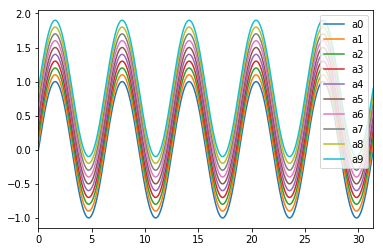

In [17]:
data_df.plot()

# <center>Importar datos</center>

In [46]:
# Vamos con un CSV
cal_csv = pd.read_csv("data/Listas Enero-Abril 2019 - 2b.csv", skiprows=[0])
al = [] # vamos a 
for i in range(len(cal_csv.NOMBRE)):
    al.append("alumno {:02d}".format(i+1))
cal_csv.set_index(pd.Series(al), inplace=True)
del cal_csv['NOMBRE']

In [47]:
cal_csv

,FALTAS,AC,EXAMEN,%EXAMEN,SER,PROYECTO,FINAL
alumno 01,NaN,11.3,5.65,3.1075,0.5,3.8,7.4075
alumno 02,NaN,12.5,6.25,3.4375,0.5,3.3,7.2375
alumno 03,NaN,12.3,6.15,3.3825,0.5,3.2,7.0825
alumno 04,NaN,12.1,6.05,3.3275,0.5,3.7,7.5275
alumno 05,NaN,13.3,6.65,3.6575,0.5,3.8,7.9575
alumno 06,NaN,14.6,7.30,4.0150,0.5,0.0,4.5150
alumno 07,NaN,7.7,3.85,2.1175,0.5,3.5,6.1175
alumno 08,NaN,14.6,7.30,4.0150,0.5,3.5,8.0150
alumno 09,NaN,12.4,6.20,3.4100,0.5,3.5,7.4100
alumno 10,NaN,15.2,7.60,4.1800,0.5,3.5,8.1800


In [32]:
# Numeritos >> NaN
cal_csv.FALTAS[np.isnan(cal_csv['FALTAS'])] = 0

In [33]:
cal_csv

,FALTAS,AC,EXAMEN,%EXAMEN,SER,PROYECTO,FINAL
alumno 00,0.0,11.3,5.65,3.1075,0.5,3.8,7.4075
alumno 01,0.0,12.5,6.25,3.4375,0.5,3.3,7.2375
alumno 02,0.0,12.3,6.15,3.3825,0.5,3.2,7.0825
alumno 03,0.0,12.1,6.05,3.3275,0.5,3.7,7.5275
alumno 04,0.0,13.3,6.65,3.6575,0.5,3.8,7.9575
alumno 05,0.0,14.6,7.30,4.0150,0.5,0.0,4.5150
alumno 06,0.0,7.7,3.85,2.1175,0.5,3.5,6.1175
alumno 07,0.0,14.6,7.30,4.0150,0.5,3.5,8.0150
alumno 08,0.0,12.4,6.20,3.4100,0.5,3.5,7.4100
alumno 09,0.0,15.2,7.60,4.1800,0.5,3.5,8.1800


In [35]:
cal_csv.describe()

,FALTAS,AC,EXAMEN,%EXAMEN,SER,PROYECTO,FINAL
count,24.000000,24.000000,24.000000,24.000000,24.0,24.000000,24.000000
mean,0.166667,12.254167,6.127083,3.369896,0.5,3.041667,6.911562
std,0.564660,2.670610,1.335305,0.734418,0.0,1.249319,1.489923
min,0.000000,7.200000,3.600000,1.980000,0.5,0.000000,3.002500
25%,0.000000,10.675000,5.337500,2.935625,0.5,3.275000,6.095000
50%,0.000000,12.350000,6.175000,3.396250,0.5,3.500000,7.385000
75%,0.000000,14.600000,7.300000,4.015000,0.5,3.700000,7.985000
max,2.000000,16.400000,8.200000,4.510000,0.5,3.900000,8.910000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a03d5bb00>]],
      dtype=object)

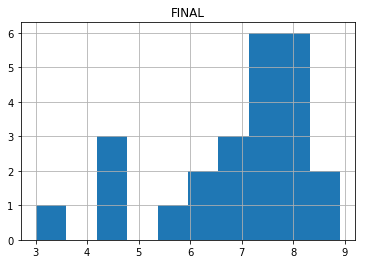

In [36]:
cal_csv.hist("FINAL")

# <center>Excel(!?)</center>

In [45]:
# pip3 install xlrd
cal_xls = pd.read_excel("data/Listas Enero-Abril 2019.xlsx", sheet_name="2b", skiprows=[0])

al = [] # vamos a 
for i in range(len(cal_xls.NOMBRE)):
    al.append("alumno {:02d}".format(i+1))
cal_xls.set_index(pd.Series(al), inplace=True)
del cal_xls['NOMBRE']
cal_xls.FALTAS[np.isnan(cal_xls['FALTAS'])] = 0
cal_xls.head()

,FALTAS,AC,EXAMEN,%EXAMEN,SER,PROYECTO,FINAL
alumno 00,0.0,11.3,5.65,3.1075,0.5,3.8,7.4075
alumno 01,0.0,12.5,6.25,3.4375,0.5,3.3,7.2375
alumno 02,0.0,12.3,6.15,3.3825,0.5,3.2,7.0825
alumno 03,0.0,12.1,6.05,3.3275,0.5,3.7,7.5275
alumno 04,0.0,13.3,6.65,3.6575,0.5,3.8,7.9575


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a03adcda0>]],
      dtype=object)

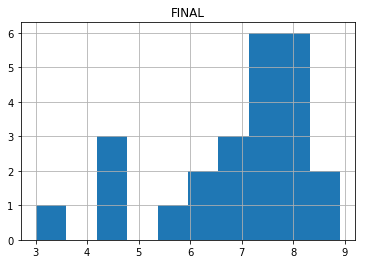

In [48]:
cal_xls.hist("FINAL")

In [49]:
cals = pd.ExcelFile("data/Listas Enero-Abril 2019.xlsx")

In [50]:
cals.sheet_names

['2b', '2c', '2d']

In [57]:
cal_2c = cals.parse(sheet_name="2c", skiprows=[0])
del cal_2c["NOMBRE"] # Anonimizar
cal_2c.describe()

,FALTAS,AC,EXAMEN,%EXAMEN,SER,PROYECTO,FINAL
count,2.0,21.000000,21.000000,21.000000,21.0,20.000000,21.000000
mean,1.0,11.209524,5.604762,3.082619,0.5,3.540000,6.954048
std,0.0,2.863897,1.431948,0.787572,0.0,0.088258,1.023728
min,1.0,5.800000,2.900000,1.595000,0.5,3.300000,4.130000
25%,1.0,10.100000,5.050000,2.777500,0.5,3.500000,6.602500
50%,1.0,10.900000,5.450000,2.997500,0.5,3.600000,6.997500
75%,1.0,13.000000,6.500000,3.575000,0.5,3.600000,7.382500
max,1.0,17.400000,8.700000,4.785000,0.5,3.600000,8.885000


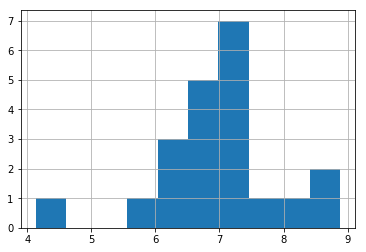

In [65]:
cal_2c.FINAL.hist()